<a href="https://colab.research.google.com/github/gabriela-148/IDS/blob/main/HW4/Problem2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gabriella Huegel**

**Project 4 Report**


**CSC346**


**10/26/23**
# Problem 2 - R

For this problem, I used Google Colab to execute all the R code. To start, I imported the necessary libraries to cleanse and examine the dataset.

I created a dataframe from the CSV called nutritionDF.

In [ ]:
# Import the readr library for the CSV file
library(readr)

# Store CSV values in dataframe
nutritionDF <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)

# Print out DF info
summary(nutritionDF)

  food item         weight_in_grams  saturated_fat      cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.000   Min.   :   0.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.000   1st Qu.:   0.00  
 Mode  :character   Median : 113.0   Median :  0.400   Median :   0.00  
                    Mean   : 149.4   Mean   :  3.988   Mean   :  32.55  
                    3rd Qu.: 218.0   3rd Qu.:  3.300   3rd Qu.:  20.00  
                    Max.   :1542.0   Max.   :119.900   Max.   :2053.00  

Normally, this would be the step where I would cleanse the data and identify outliers. In this case, I do not believe cleansing the data would be helpful. This is because the data related to food items. In order for this data to be accurate, it cannot be cleansed because that would mean I am giving out inaccurate information or data analysis that could have negative repercussions on those who use this analysis.

Next, I displayed the food items with the highest amount of saturated fat.

In [ ]:
# Sort by the first column; only display the first three columns

head(nutritionDF[order(nutritionDF$saturated_fat, decreasing = TRUE), c("food item", "saturated_fat")], 5)

food item,saturated_fat
<chr>,<dbl>
CHEESECAKE 1 CAKE,119.9
ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,118.3
YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,92.0
CREME PIE 1 PIE,90.1
LARD 1 CUP,80.4


From this list, we can see that Cheesecake has the highest amount of saturated fat.

Then, I calculated the amount of saturated fat per gram of food per item. This data is important because the amount of saturated fat per gram may be different than the total amount in a certain food.

In [ ]:

# Create the new variable "saturated_fat_per_gram"
nutritionDF$saturated_fat_per_gram <- nutritionDF$saturated_fat / nutritionDF$weight_in_grams

# Sort the data frame by the new variable in decreasing order and select the top 5 rows
head(nutritionDF[order(nutritionDF$saturated_fat_per_gram, decreasing = TRUE), c("food item", "saturated_fat_per_gram")], 5)



food item,saturated_fat_per_gram
<chr>,<dbl>
BUTTER; SALTED 1 TBSP,0.5071429
BUTTER; UNSALTED 1 TBSP,0.5071429
BUTTER; SALTED 1/2 CUP,0.5053097
BUTTER; UNSALTED 1/2 CUP,0.5053097
BUTTER; SALTED 1 PAT,0.5000000


I displayed the top five foods with the highest saturated fat per gram, and this list is different than the total amount of saturated fat. In this list, butter takes the cake with the highest amount fat per gram. This did not surprise me as butter is all saturated fat.

Next, I scaled the saturated fat per gram attribute so I could identify outliers. I used the StandardScaler to create a normal distribution. After scaling, I could apply the 3 standard deviation rule which states that any values outside 3 or -3 are outliers. I used that logic here. Then, I created a density plot for the outliers of the dataset.

In [ ]:

#High end of scale
nutritionDF$scaled_saturated <- scale( x= nutritionDF$saturated_fat_per_gram)

devRule <- (nutritionDF$scaled_saturated > 3 | nutritionDF$scaled_saturated < -3)
# how many outliers are there?
cat ("There are", sum(devRule), "outliers \n\n")

nutritionDF$scaled_saturated[which(devRule)]

high_outliers <- nutritionDF[nutritionDF$scaled_saturated > 3, "food item"]

high_outliers


There are 15 outliers 



[1] 4.238469 3.936637 4.202078 3.940837 7.079055 7.079055 5.368580 3.276520
 [9] 5.370282 3.222049 7.106775 7.106775 6.998763 6.998763 4.730522

food item
<chr>
CHOCOLATE; BITTER OT BAKING 1 OZ
COCONUT; RAW; SHREDDED 1 CUP
COCONUT; DRIED; SWEETND;SHREDD1 CUP
COCONUT; RAW; PIECE 1 PIECE
BUTTER; SALTED 1/2 CUP
BUTTER; UNSALTED 1/2 CUP
LARD 1 CUP
FATS; COOKING/VEGETBL SHORTENG1 TBSP
LARD 1 TBSP


In [ ]:
# Low end of scale

nutritionDF$scaled_saturated <- scale( x= nutritionDF$saturated_fat_per_gram)

devRule <- (nutritionDF$scaled_saturated > 3 | nutritionDF$scaled_saturated < -3)
low_outliers <- nutritionDF[nutritionDF$scaled_saturated < -3, "food item"]

low_outliers

food item
<chr>


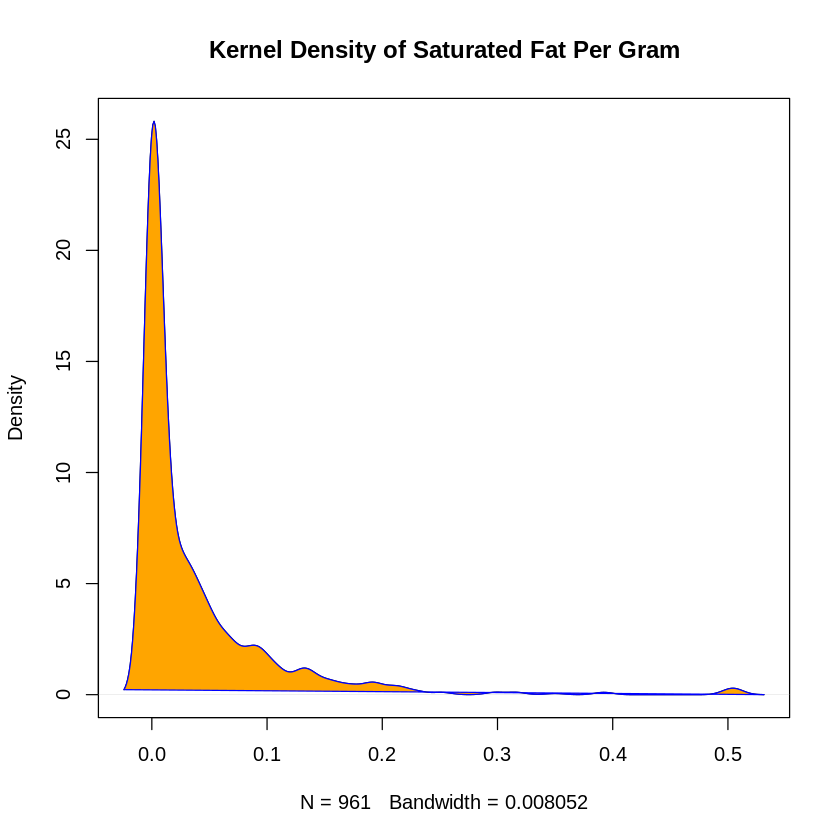

In [ ]:

# Kernel Density Plot
d2 <- density(nutritionDF$saturated_fat_per_gram)

# plots the results
plot(d2, main="Kernel Density of Saturated Fat Per Gram")

# plots the results (filled)
polygon(d2, col="orange", border="blue")

From this density plot we can conclude that most of the food items listed have a saturated fat per gram average between 0.0 and 0.1.

Next, I checked to see if there are any missing values. When I examined the data I noticed that there were many 0 values. Normally, I would impute the average of each column. However, since we are dealing with food items, in this case we do have to impute any values because not all foods with contain cholesterol or saturated fat. So no values need to be imputed.

Next, I scaled all the numeric attributes which are weight and cholesterol. I used the same process as idenfiying outliers in saturated fat per gram using the StandardScaler.

In [ ]:
# Z score of weight

nutritionDF$scaled_weight <- scale( x= nutritionDF$weight_in_grams)

devRule <- (nutritionDF$scaled_weight > 3 | nutritionDF$scaled_weight < -3)
# how many outliers are there?
cat ("There are", sum(devRule), "outliers \n\n")

nutritionDF$scaled_saturated[which(devRule)]

There are 22 outliers 



[1] -0.002044422 -0.033175034  1.071363971 -0.046991311  0.012072675
 [6]  0.197453016  0.087714184  0.090315770  0.072732780 -0.156587144
[11] -0.122985249 -0.093992685  0.693542527  0.451275965  0.011916415
[16]  0.943754299 -0.107594135 -0.168400617 -0.153999082 -0.123595841
[21]  0.935163174 -0.375719214

In [ ]:
# Z score of cholesterol
nutritionDF$scaled_cholesterol <- scale( x= nutritionDF$cholesterol)

devRule <- (nutritionDF$scaled_cholesterol > 3 | nutritionDF$scaled_cholesterol < -3)
# how many outliers are there?
cat ("There are", sum(devRule), "outliers \n\n")

nutritionDF$scaled_saturated[which(devRule)]

There are 17 outliers 



[1] -0.117289286  0.058708417 -0.002044422 -0.033175034  1.071363971
 [6]  1.010605062 -0.046991311  0.012072675  0.197453016  0.087714184
[11]  0.090315770  0.072732780 -0.093992685  0.693542527  0.451275965
[16]  0.011916415  0.943754299

From this process of identifying outliers, I found that weight has 22 outliers and cholesterol has 17 outliers. However, I did not do anything to change this because these measures provided here are what is measured in the specific foods. The amount of cholesterol or the weight of an item can be changed.

For this analysis, I did not have any context for the data. There was no reference sheet to describe the data or to explain why the data was collected. As I mentioned before, I can only make assumptions about what the data could be interpreted as using common sense.